In [ ]:
### 🔧 TAREA
#Explora el dataset e intenta responder:
#
#- ¿Qué variables tienen valores faltantes?
#- ¿Qué variables parecen más correlacionadas con el target?
#- ¿Hay valores extremos que deberías tratar?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Configuración de estilo
sns.set(style="whitegrid")

In [16]:
import sys
import os
sys.path.append(os.path.abspath("../src"))


In [18]:
# 📥 Cargar el dataset limpio
df = pd.read_csv("/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/DeepNeuralNetworkUSS/Projects/Credit/data/credit_clean.csv")

# 👁️ Primer vistazo a los datos
df.head()

# 🧼 Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40016 entries, 0 to 40015
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      40016 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  40016 non-null  float64
 2   age                                   40016 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  40016 non-null  int64  
 4   DebtRatio                             40016 non-null  float64
 5   MonthlyIncome                         40016 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       40016 non-null  int64  
 7   NumberOfTimes90DaysLate               40016 non-null  int64  
 8   NumberRealEstateLoansOrLines          40016 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  40016 non-null  int64  
 10  NumberOfDependents                    40016 non-null  float64
dtypes: float64(4), 

Distribución del target:
SeriousDlqin2yrs
1    0.5002
0    0.4998
Name: proportion, dtype: float64


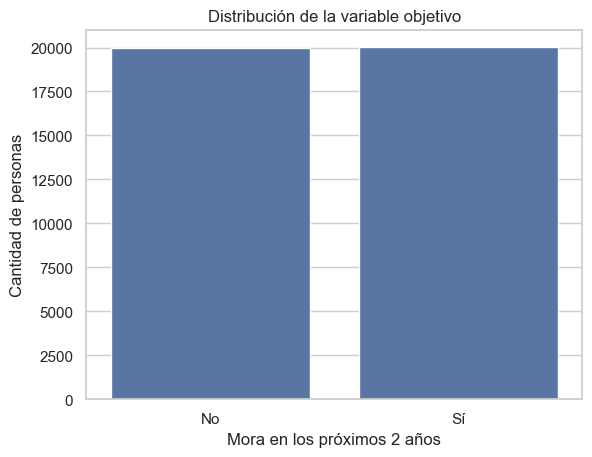

In [20]:
# 🔍 Distribución de la variable objetivo
target_counts = df["SeriousDlqin2yrs"].value_counts(normalize=True)
print("Distribución del target:")
print(target_counts)

sns.countplot(data=df, x="SeriousDlqin2yrs")
plt.title("Distribución de la variable objetivo")
plt.xlabel("Mora en los próximos 2 años")
plt.ylabel("Cantidad de personas")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

In [22]:
# 📊 Estadísticas descriptivas
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000
mean,0.500200,4.687565,49.267893,1.278888,331.312144,6057.155913,8.216263,1.055203,1.000925,0.920332,0.833742
std,0.500006,188.643899,14.293645,8.290821,2093.376551,6878.873207,5.400697,8.293279,1.267900,8.270203,1.165660
min,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.072469,39.000000,0.000000,0.182940,3550.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.441448,48.000000,0.000000,0.390770,5443.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.941515,59.000000,1.000000,0.868648,6812.750000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,29110.000000,101.000000,98.000000,326442.000000,699530.000000,57.000000,98.000000,29.000000,98.000000,9.000000


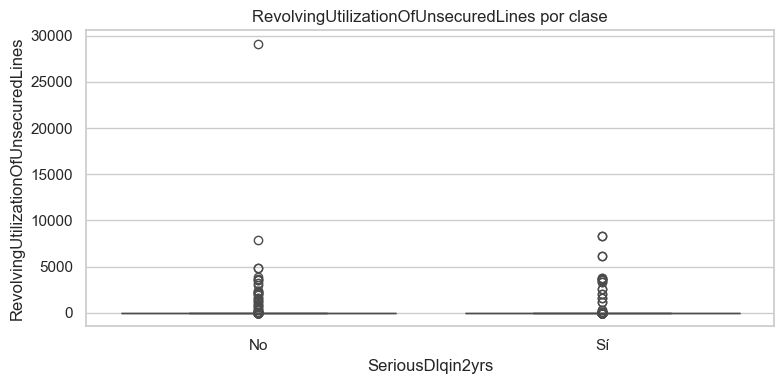

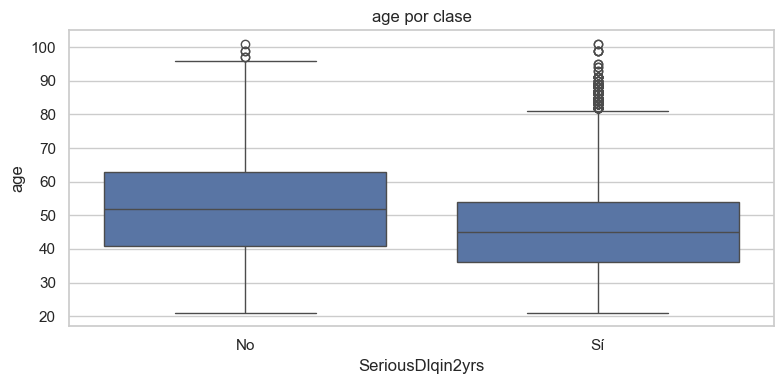

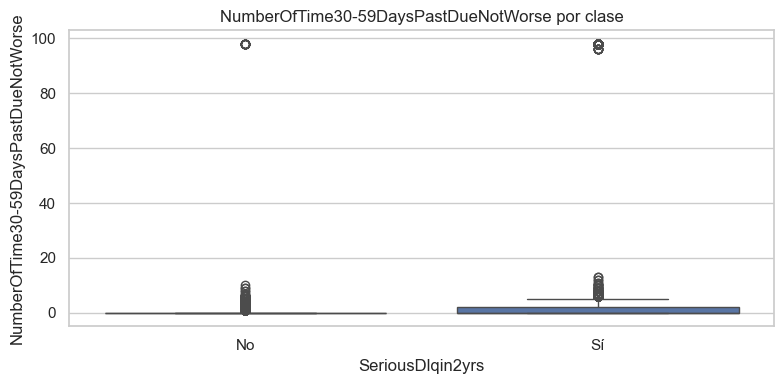

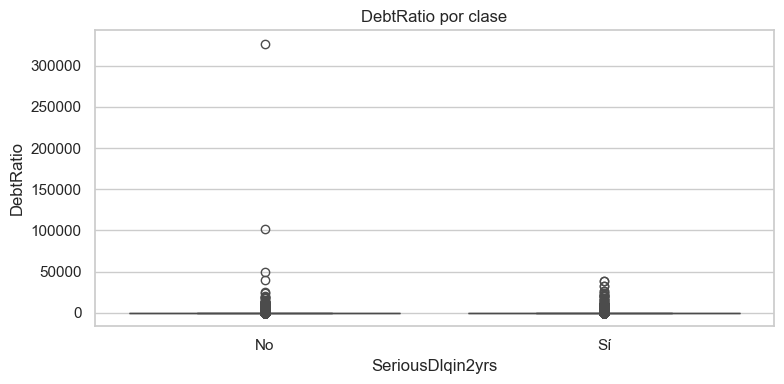

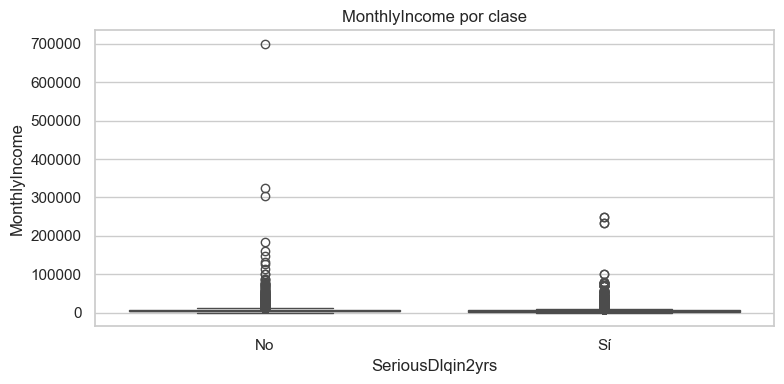

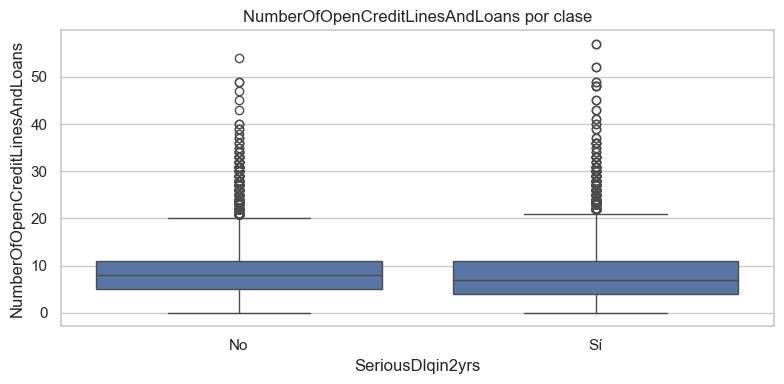

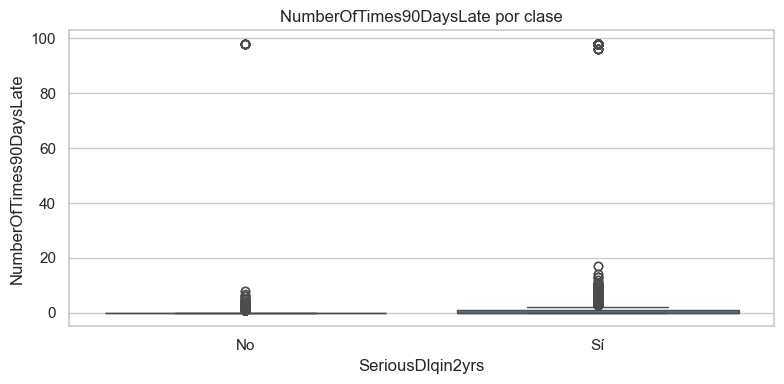

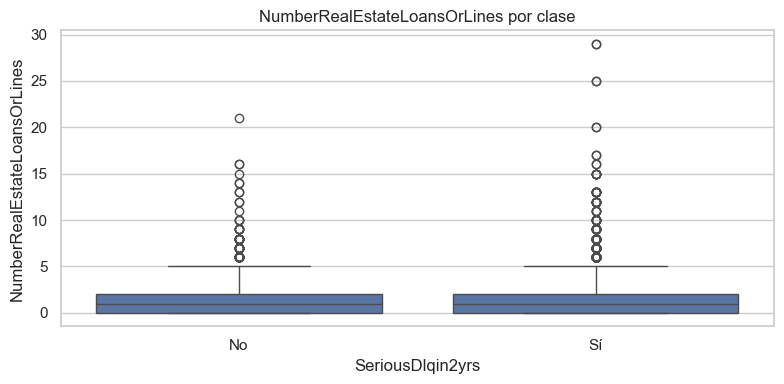

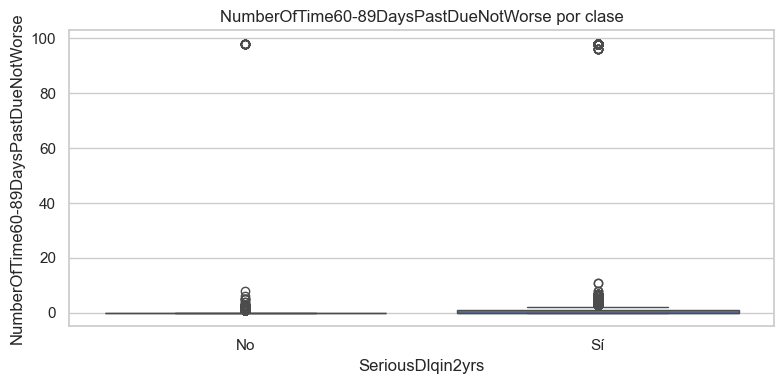

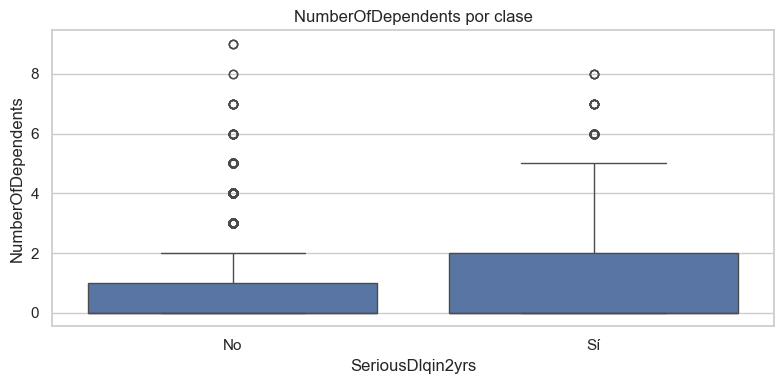

In [24]:
# 📉 Boxplots por variable numérica
for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="SeriousDlqin2yrs", y=col, data=df)
        plt.title(f"{col} por clase")
        plt.xticks([0, 1], ["No", "Sí"])
        plt.tight_layout()
        plt.show()

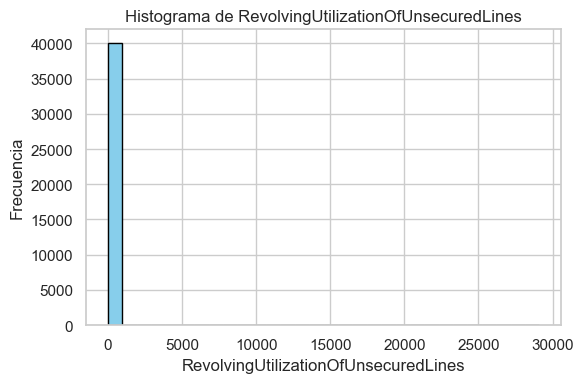

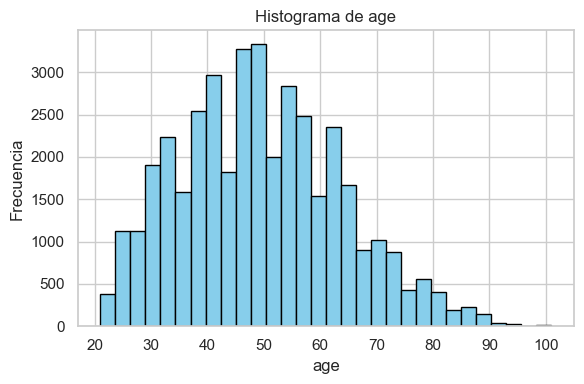

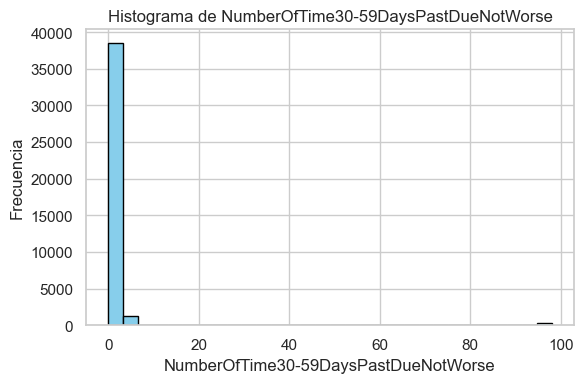

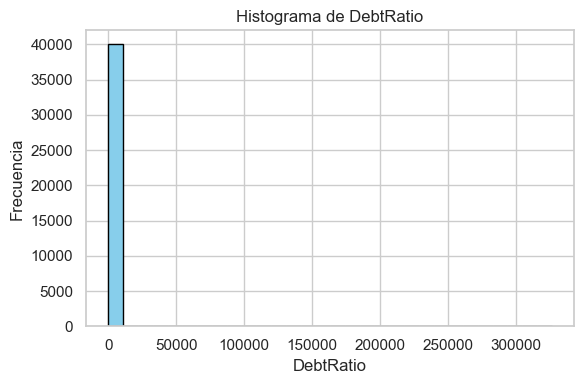

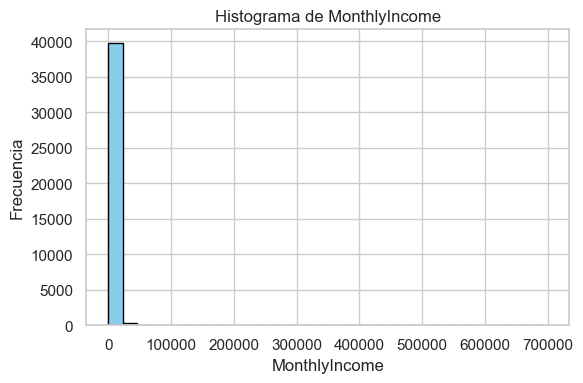

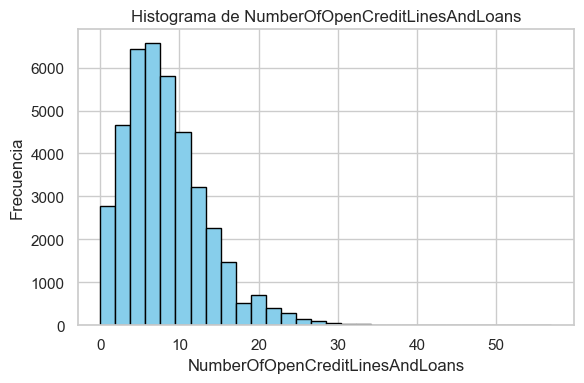

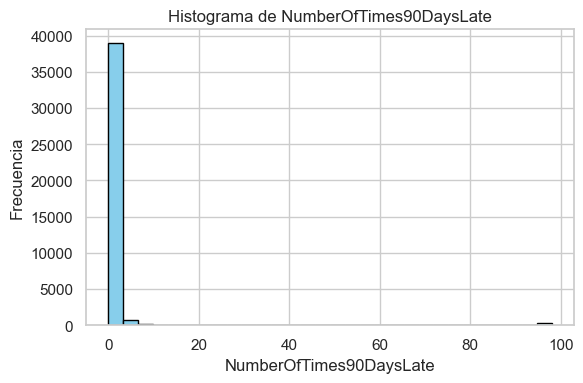

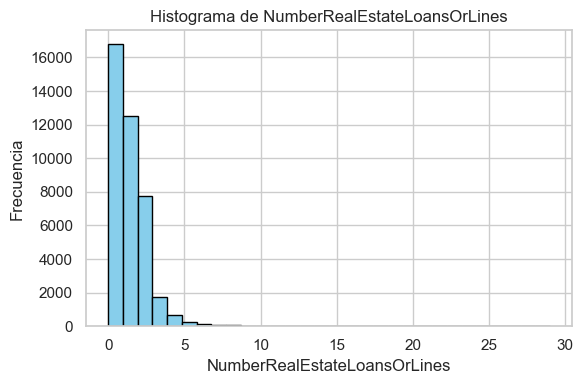

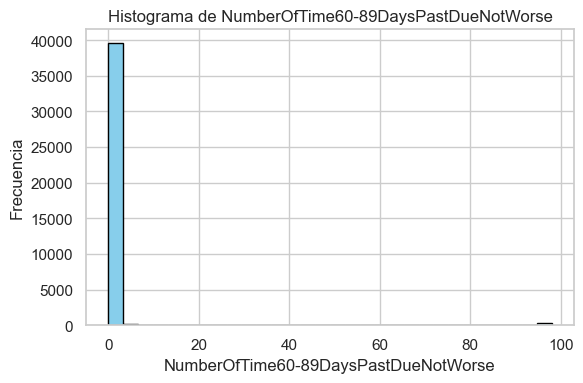

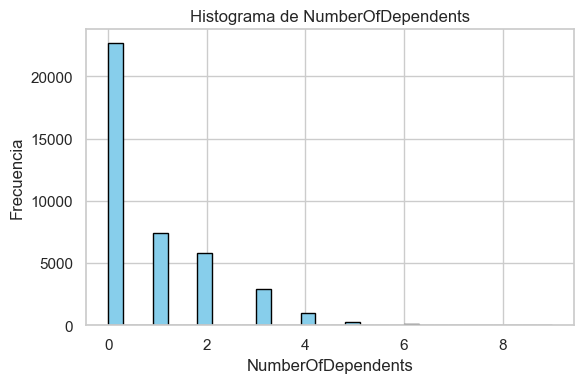

In [28]:
# 🧠 TODO: Agregar histograma por variable (para tarea)
# for col in df.columns:
#     if col != "SeriousDlqin2yrs":
#         plt.hist(df[col], bins=30)
#         plt.title(f"Histograma de {col}")
#         plt.show()

for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.figure(figsize=(6, 4))
        plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
        plt.title(f"Histograma de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


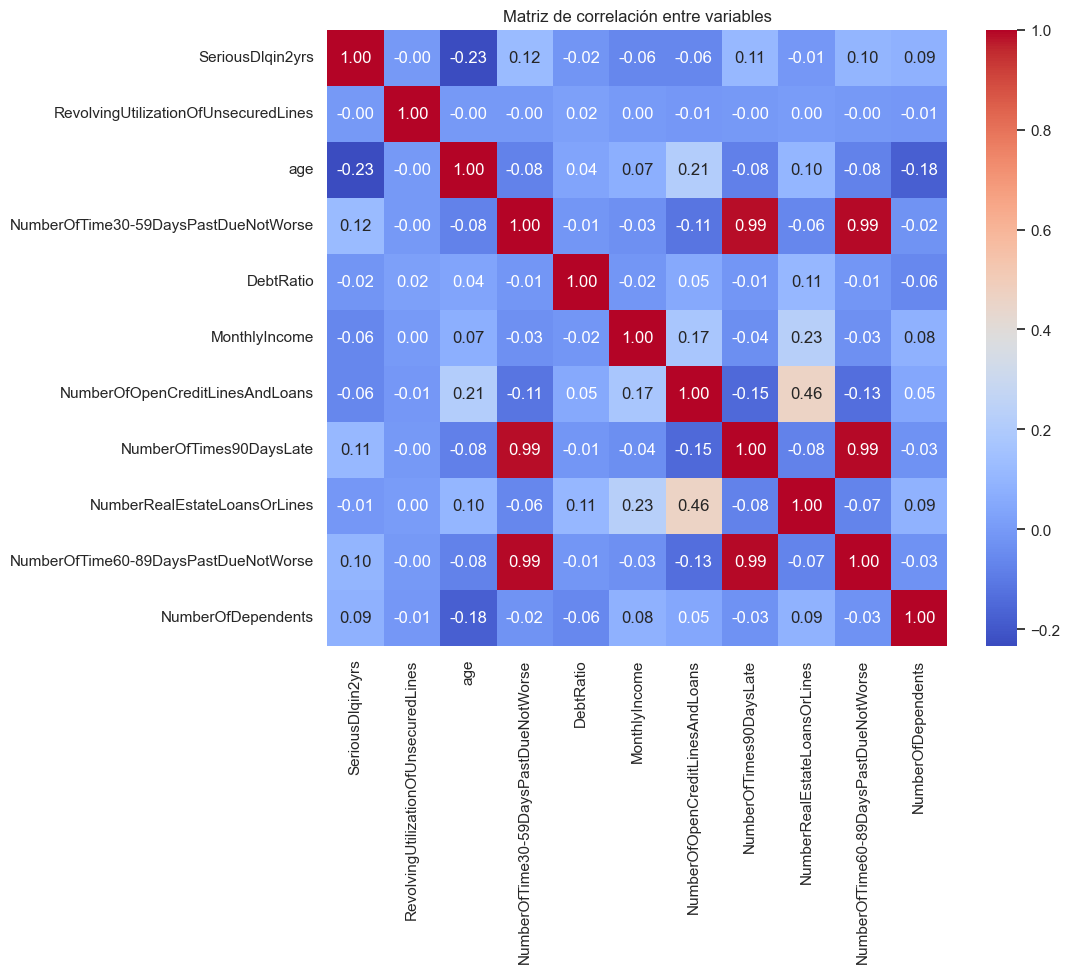

In [30]:
# 🔗 Mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()


🔍 Análisis de RevolvingUtilizationOfUnsecuredLines
count    40016.000000
mean         4.687565
std        188.643899
min          0.000000
25%          0.072469
50%          0.441448
75%          0.941515
max      29110.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


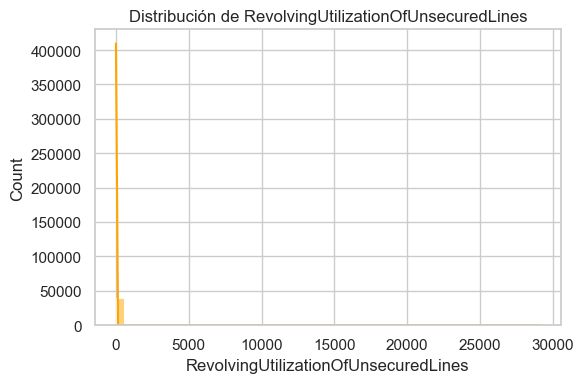

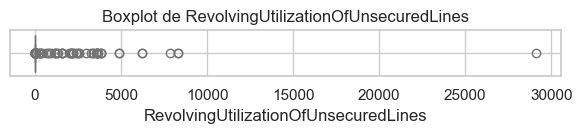

Outliers detectados en RevolvingUtilizationOfUnsecuredLines: 119
Rango permitido: [-1.23, 2.25]

🔍 Análisis de MonthlyIncome
count     40016.000000
mean       6057.155913
std        6878.873207
min           1.000000
25%        3550.000000
50%        5443.000000
75%        6812.750000
max      699530.000000
Name: MonthlyIncome, dtype: float64


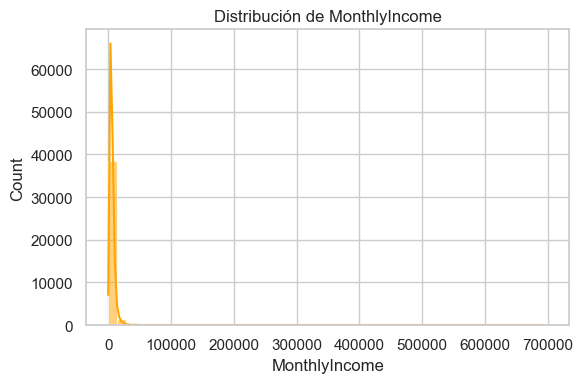

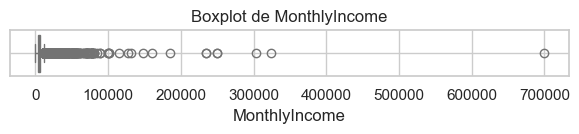

Outliers detectados en MonthlyIncome: 2647
Rango permitido: [-1344.12, 11706.88]

🔍 Análisis de DebtRatio
count     40016.000000
mean        331.312144
std        2093.376551
min           0.000000
25%           0.182940
50%           0.390770
75%           0.868648
max      326442.000000
Name: DebtRatio, dtype: float64


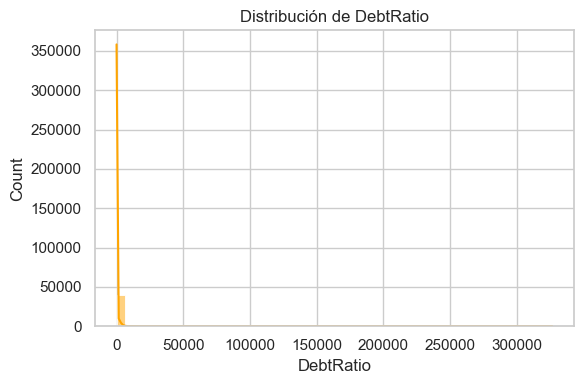

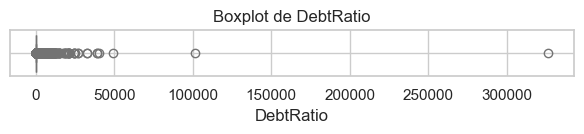

Outliers detectados en DebtRatio: 7696
Rango permitido: [-0.85, 1.90]


In [32]:
# 📝 TODO: Identificar outliers o valores extremos (completar)
# - Analizar la columna RevolvingUtilizationOfUnsecuredLines
# - Verificar valores inusuales en MonthlyIncome o DebtRatio

import seaborn as sns
import matplotlib.pyplot as plt

variables = ['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome', 'DebtRatio']

for col in variables:
    print(f"\n Análisis de {col}")
    print(df[col].describe())
    
    # Histograma
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True, color='orange')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Detección de outliers con IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"Outliers detectados en {col}: {len(outliers)}")
    print(f"Rango permitido: [{lower_bound:.2f}, {upper_bound:.2f}]")


In [ ]:
# 🧩 Comentarios
# - ¿Qué variables parecen más correlacionadas con la clase objetivo?

#Según la matriz de correlación algunas variables que podrían estár en relación con SeriousDlqin2yrs serían: 
#NumberOfTime30-59DaysPastDueNotWorse
#NumberOfTime60-89DaysPastDueNotWorse
#NumberOfTimes90DaysLate
#DebtRatio

#Si bien estas variables muestran una correlación positiva con el incumplimiento, es leve, aunque tiene sentido, pues refleja que hay 
#un tiempo de morosidad y por tanto, un incumplimiento de una obligación bancaria.


# - ¿Hay variables que podrían necesitar transformación o escalamiento?

#Sí, RevolvingUtilizationOfUnsecuredLines, DebtRatio y MonthlyIncome presentan distribuciones sesgadas y presencia de outliers
# se podría pensar en una transformación logarítmica o raíz cuadrada (para reducir sesgo), además de un escalamiento 
# (MinMax o StandardScaler) antes de correr la red neuronal.

# - ¿Existe desbalance significativo?

# no, el desbalance quizás no afecte, (49,98 vs 50,02); sin embargo, habría que analizar las métricas más adelante

In [ ]:
### 📊 Pregunta de reflexión
#Después del análisis exploratorio:
#
#- ¿Qué variable crees que será más relevante para predecir el default?
# Dado que es un negocio de productos bancarios, quizás el más relevante sea NumberOfTimes90DaysLate, pues tiene una correlación positva con
# la variable objetivo, además que una persona que tiene más de 90 días de retraso en el pago oportuno, seguramente será un potencial
# deudor


#- ¿Alguna variable presenta un comportamiento que te parezca inesperado?

# RevolvingUtilizationOfUnsecuredLines, no es posible que una persona gaste mas del crédito disponible. (proporción)